In [1]:
#import the libraries that I am going to use
import pandas as pd 
import psycopg2
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Definition of the function for connection of the database server
def connectDF():
    conn = psycopg2.connect(
    host="localhost",
    database="Moviedatabase",
    user="postgres",
    password="Fender2001")
    return conn

In [3]:
#establishment of the connection with my server
conn = connectDF()
print("connnection succes.")

connnection succes.


In [4]:
#Create a DataFrame from the box office revenue (in millions) for the Director 'Steven Spielberg'


df1 = pd.read_sql(''' 
SELECT s.total_box_office / 1000000 as box_office, did.director
FROM sales as s
INNER JOIN movie_id as mid ON s.newurl = mid.shortenedurl
INNER JOIN has_director as hd ON mid.shortenedurl = hd.shortendurl
INNER JOIN director_id as did ON hd.director = did.director
WHERE did.director = 'Steven Spielberg'
''', conn)


C:\Users\ginok\AppData\Local\Temp\ipykernel_4964\617152820.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df1 = pd.read_sql('''


In [5]:
#Create a DataFrame from the box office revenue (in millions) for the Director 'Christopher Nolan'


df2 = pd.read_sql(''' 
SELECT s.total_box_office / 1000000 as box_office, did.director
FROM sales as s
INNER JOIN movie_id as mid ON s.newurl = mid.shortenedurl
INNER JOIN has_director as hd ON mid.shortenedurl = hd.shortendurl
INNER JOIN director_id as did ON hd.director = did.director
WHERE did.director = 'Christopher Nolan'
''', conn)


C:\Users\ginok\AppData\Local\Temp\ipykernel_4964\3928056556.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df2 = pd.read_sql('''


In [6]:
#Create a DataFrame from the box office revenue (in millions) for the Director 'James Cameron'


df3 = pd.read_sql(''' 
SELECT s.total_box_office / 1000000 as box_office, did.director
FROM sales as s
INNER JOIN movie_id as mid ON s.newurl = mid.shortenedurl
INNER JOIN has_director as hd ON mid.shortenedurl = hd.shortendurl
INNER JOIN director_id as did ON hd.director = did.director
WHERE did.director = 'James Cameron'
''', conn)

C:\Users\ginok\AppData\Local\Temp\ipykernel_4964\3772382271.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df3 = pd.read_sql('''


In [7]:
#Create a DataFrame from the box office revenue (in millions) for the Director 'Anthony Russo'


df4 = pd.read_sql(''' 
SELECT s.total_box_office / 1000000 as box_office, did.director
FROM sales as s
INNER JOIN movie_id as mid ON s.newurl = mid.shortenedurl
INNER JOIN has_director as hd ON mid.shortenedurl = hd.shortendurl
INNER JOIN director_id as did ON hd.director = did.director
WHERE did.director = 'Anthony Russo'
''', conn)

C:\Users\ginok\AppData\Local\Temp\ipykernel_4964\2750481088.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df4 = pd.read_sql('''


In [8]:
#Create a DataFrame from the box office revenue (in millions) for the Director 'David Yates'


df5 = pd.read_sql(''' 
SELECT s.total_box_office / 1000000 as box_office, did.director
FROM sales as s
INNER JOIN movie_id as mid ON s.newurl = mid.shortenedurl
INNER JOIN has_director as hd ON mid.shortenedurl = hd.shortendurl
INNER JOIN director_id as did ON hd.director = did.director
WHERE did.director = 'David Yates'
''', conn)

C:\Users\ginok\AppData\Local\Temp\ipykernel_4964\4117332013.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df5 = pd.read_sql('''


In [9]:
#Create a DataFrame from the box office revenue (in millions) for the Director 'Michael Bay'


df6 = pd.read_sql(''' 
SELECT s.total_box_office / 1000000 as box_office, did.director
FROM sales as s
INNER JOIN movie_id as mid ON s.newurl = mid.shortenedurl
INNER JOIN has_director as hd ON mid.shortenedurl = hd.shortendurl
INNER JOIN director_id as did ON hd.director = did.director
WHERE did.director = 'Michael Bay'
''', conn)

C:\Users\ginok\AppData\Local\Temp\ipykernel_4964\4233666826.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df6 = pd.read_sql('''


In [10]:
#Create a DataFrame from the average box office revenue (in millions) for the the rest of directors


df7 = pd.read_sql(''' 
SELECT AVG(s.total_box_office / 1000000) as box_office, 'other director' as director
FROM sales as s
INNER JOIN movie_id as mid ON s.newurl = mid.shortenedurl
INNER JOIN has_director as hd ON mid.shortenedurl = hd.shortendurl
INNER JOIN director_id as did ON hd.director = did.director
WHERE did.director NOT IN ('Michael bay', 'David Yates', 'James Cameron', 'Christopher Nolan', 'Steven Spielberg', 'Anthony Russo') AND s.total_box_office != 0
GROUP BY mid.movie_id
''', conn)

conn.close()
print("Connection closed.")

Connection closed.


C:\Users\ginok\AppData\Local\Temp\ipykernel_4964\3636449245.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df7 = pd.read_sql('''


In [11]:
#I merge all the DataFrames of each director into one combined DataFrame
cdf = pd.concat([df1, df2, df3, df4, df5, df6, df7])

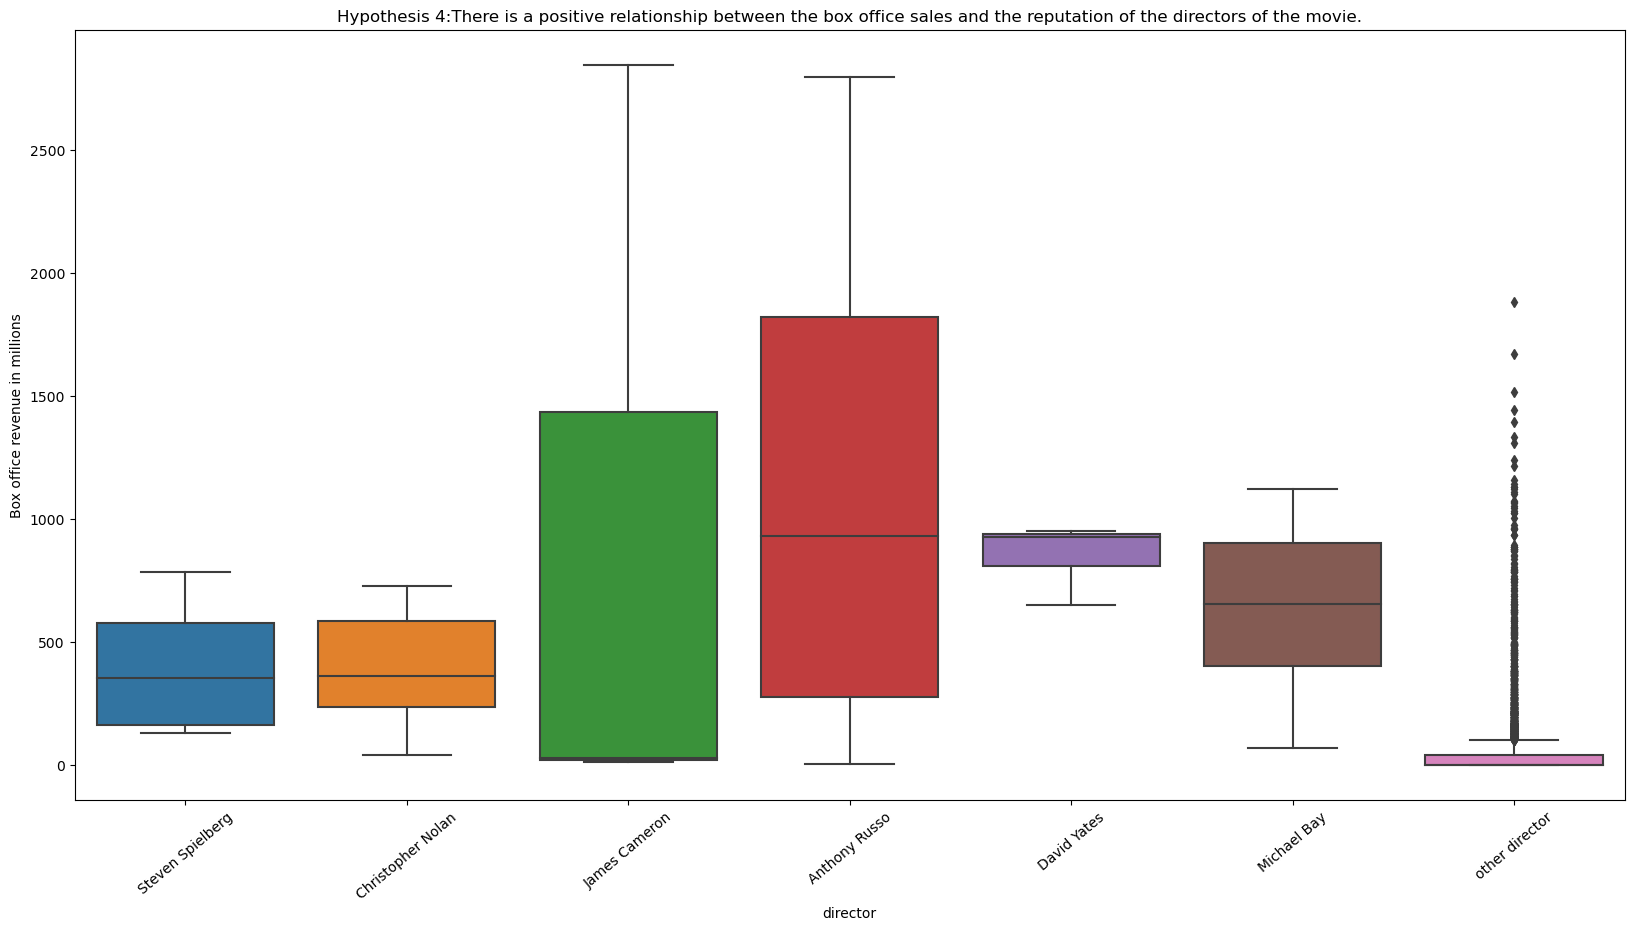

In [12]:
#Here I create one boxplot per director (or other directors) with on the Y-axis the box office 
plt.figure(figsize=(20, 10))
sns.boxplot(x="director", y="box_office", data=cdf)
plt.xticks(rotation=40)
plt.xlabel('director')
plt.ylabel('Box office revenue in millions')
plt.title('Hypothesis 4:There is a positive relationship between the box office sales and the reputation of the directors of the movie.')
plt.show()

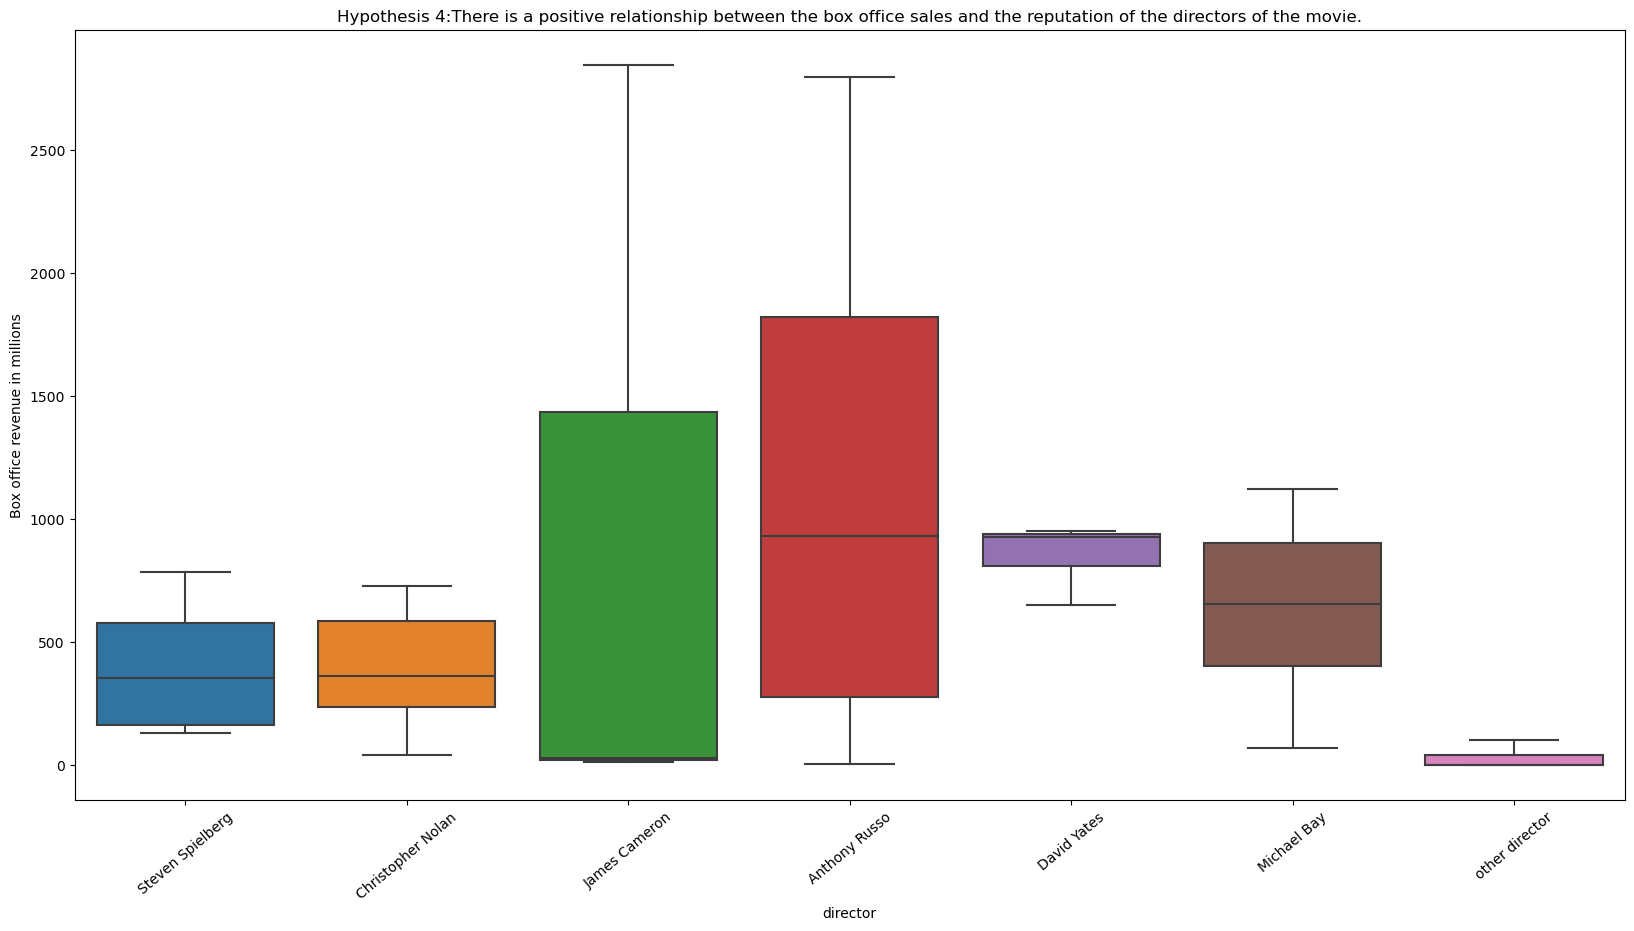

In [13]:
#Here I create one boxplot per director (or other directors) with on the Y-axis the box office without the outliers
plt.figure(figsize=(20, 10))
sns.boxplot(x="director", y="box_office", data=cdf, showfliers=False)
plt.xticks(rotation=40)
plt.xlabel('director')
plt.ylabel('Box office revenue in millions')
plt.title('Hypothesis 4:There is a positive relationship between the box office sales and the reputation of the directors of the movie.')
plt.show()